In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools.diffusion import powerlaw, MLE, MLE_error

# Question A
when $\alpha = 2$, by using the transformation:
$$y = cx^{-\alpha}$$
We can get $P(y) \sim y^{-\frac{3}{2}}$.
$$P(x) dx = P(y)dy $$
$$P(y) = P(x) |\frac{dx}{dy}|$$

As P(x) is a uniform distribution
$$P(y) = \frac{1}{\alpha} y^{-\frac{1}{\alpha} - 1}$$

so when $\alpha=2$, we can get $P(y) = c y^{-1.5}$

In [2]:
def plot_hist(rn, ax, bins, label=""):
    x = bins
    bins, edge = np.histogram(rn, bins=x, density=True)
    bin_center = (edge[:-1] + edge[1:]) / 2
    ax.plot(bin_center, bins, label=label, linewidth=1)

In [6]:
N = [int(10 ** i) for i in range(2, 8)]
mu = np.zeros(len(N))
rns = []
error = np.zeros(len(N))
for i, n in enumerate(N):
    rn = powerlaw(n, 2)
    rns.append(rn)
    mu[i] = MLE(rn)
    error[i] = MLE_error(2, n)

# Distribution

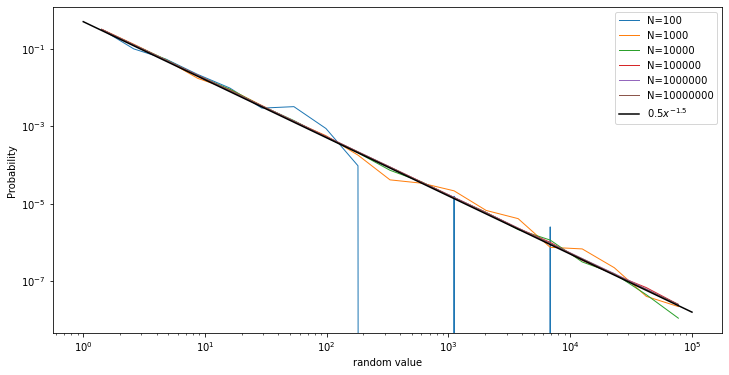

In [33]:
plt.figure(figsize=(12, 6))
for i in range(len(N)):
    plot_hist(rns[i], plt.gca(), f"N={N[i]}",)
# plot_hist(rns[1], plt.gca(), f"N={N[1]}")
x = np.logspace(0, 5, 100)
y = 0.5 * x ** (-1.5)
plt.plot(x, y, 'k', label=r"$0.5 x^{-1.5}$")
plt.legend()
plt.xlabel("random value")
plt.ylabel("Probability")
plt.xscale("log")
plt.yscale("log")

# MLE $\mu$ and estimated error

Text(0.5, 0, 'N')

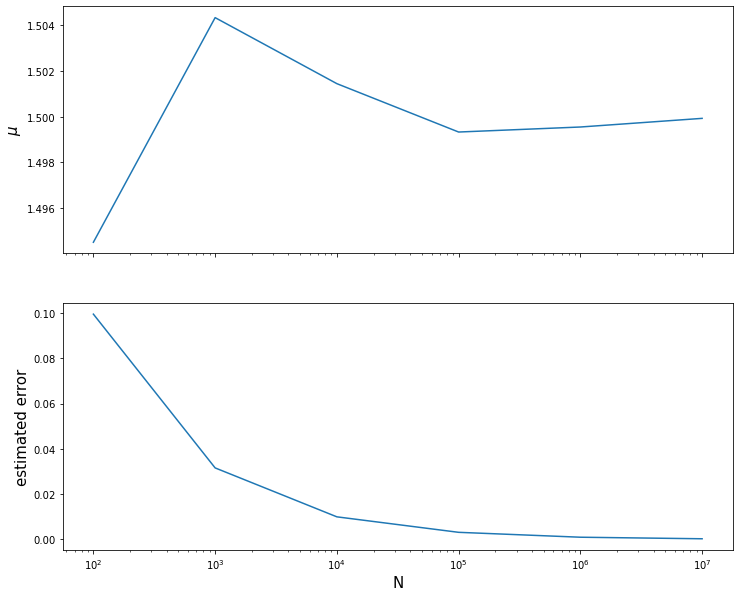

In [45]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
ax[0].plot(N, mu)
ax[0].set_ylabel(r"$\mu$", fontsize=15)
ax[1].plot(N, error)
ax[1].set_ylabel(r"estimated error", fontsize=15)
ax[1].set_xscale('log')
ax[1].set_xlabel("N", fontsize=15)

# Question B

Distribution of first passage time for different p

In [77]:
from tools.diffusion import main
N = [20, 50, 100, 500, 1000]
fpts = []
p = 0.35
for n in N:
    fpts.append(main(n, 5, p).reshape(-1, 1))

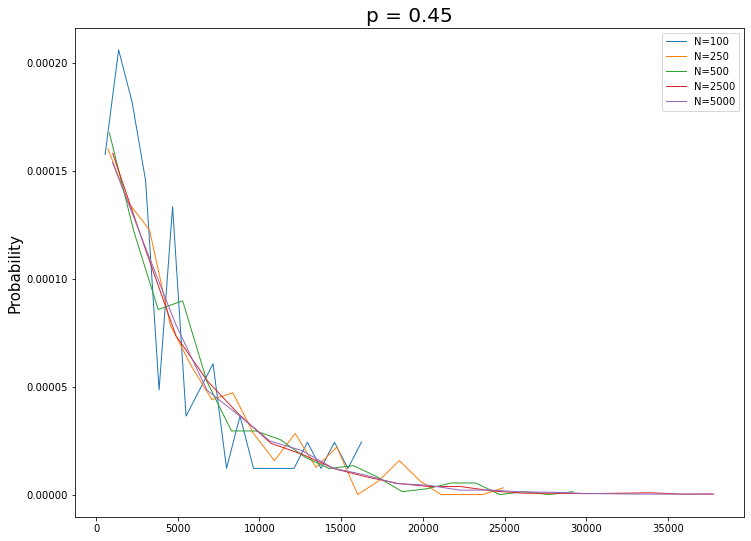

In [76]:
plt.figure(figsize=(12, 9))
for i, fpt in enumerate(fpts):
    plot_hist(fpt, plt.gca(), 20, label=f"N={N[i] * 5}")
plt.title(f"p = {p}", fontsize=20)
plt.ylabel("Probability", fontsize=15)
plt.legend()

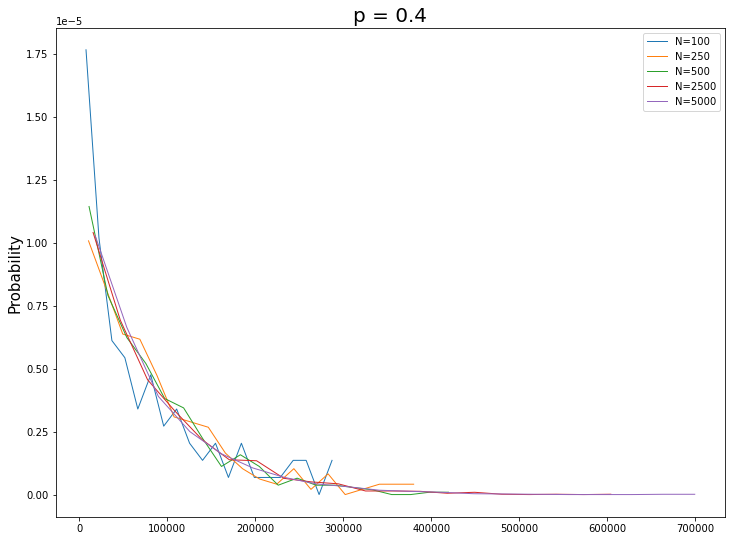

In [74]:
plt.figure(figsize=(12, 9))
for i, fpt in enumerate(fpts):
    plot_hist(fpt, plt.gca(), 20, label=f"N={N[i] * 5}")
plt.title("p = {p}", fontsize=20)
plt.ylabel("Probability", fontsize=15)
plt.legend()

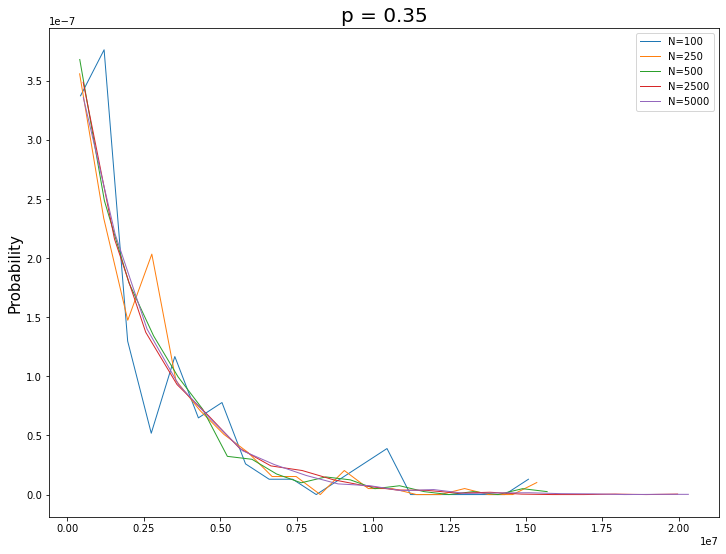

In [78]:
plt.figure(figsize=(12, 9))
for i, fpt in enumerate(fpts):
    plot_hist(fpt, plt.gca(), 20, label=f"N={N[i] * 5}")
plt.title(f"p = {p}", fontsize=20)
plt.ylabel("Probability", fontsize=15)
plt.legend()

> It takes too much time to get first passage time when p is small, so I haven't plot it for p=0.2 and 0.3

# Question C

In this calculation, I set $\Delta=3$ steps, batch size N = 100, and M = 50, The distribution of the first passage time for the trajectories is shown below.

With the increase of Q, the time for getting one trajectory becomes shorter, So for reaching the biggest efficiency, we can choose `Q=1`, which means the order parameters will always increase in one segment.

In [3]:
from tools.steps import STEPS, STEPS_modify

In [5]:
Q = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fpts = [np.zeros(500) for i in range(len(Q))]
for i in range(500):
    for j in range(len(Q)):
        fpts[j][i] = STEPS(0.2, Q[j], delta=3, N=100, M=50)

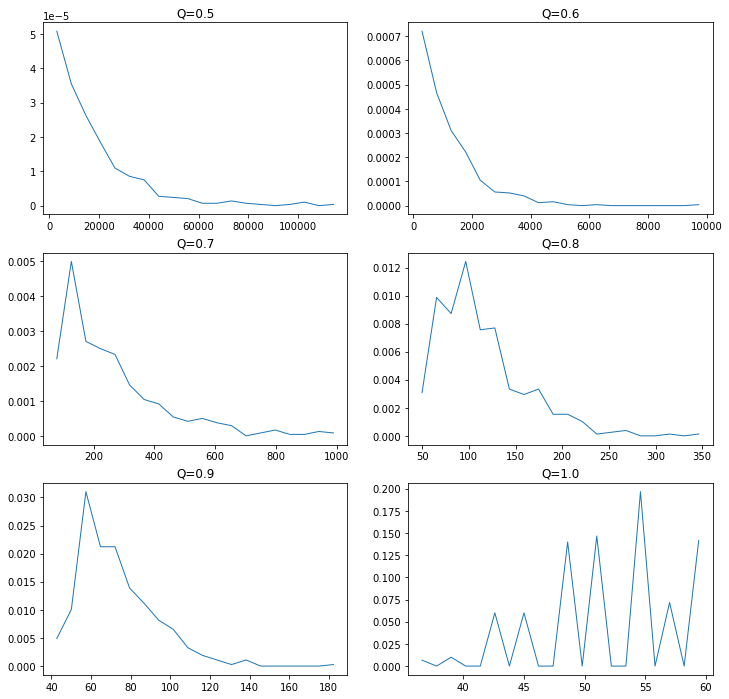

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))
for i in range(6):
    ax = axs[i // 2][i % 2]
    plot_hist(fpts[i], ax, 20)
    ax.set_title(f"Q={Q[i]}")

## Modified STEPS

In [6]:
Q = [0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
fpts = [np.zeros(1000) for i in range(len(Q))]
for i in range(1000):
    for j in range(len(Q)):
        fpts[j][i] = STEPS_modify(0.2, Q[j], 100, N=100, M=50)

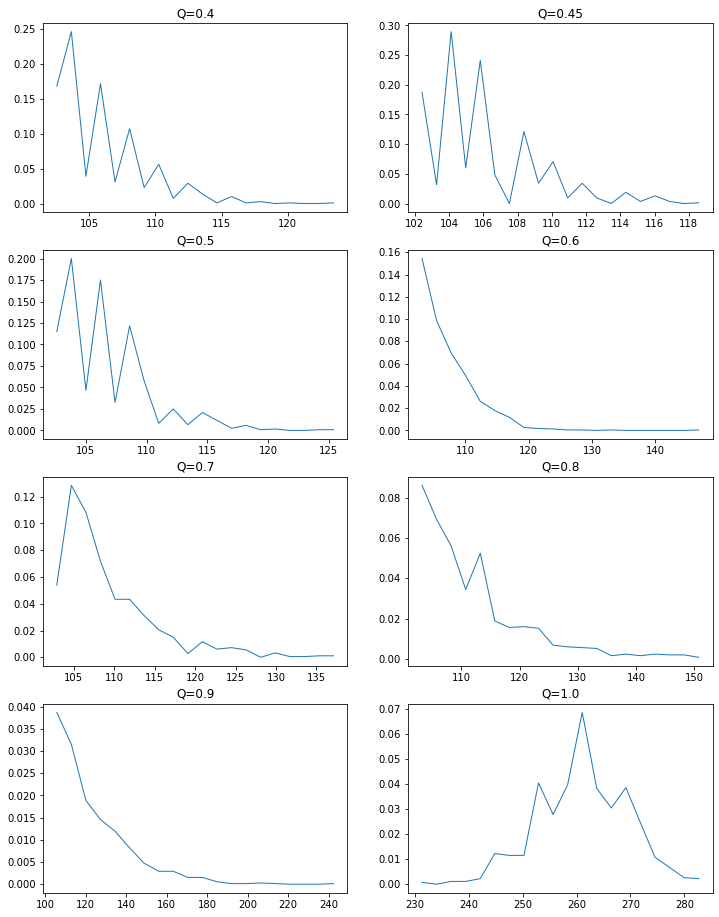

In [8]:
fig, axs = plt.subplots(4, 2, figsize=(12, 16))
for i in range(8):
    ax = axs[i // 2][i % 2]
    plot_hist(fpts[i], ax, 20)
    ax.set_title(f"Q={Q[i]}")

In the modified case, around Q=0.45, I can get a highest effiency.